<a href="https://colab.research.google.com/github/Foxess/Myfirs/blob/main/NEURALNETS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IMPLEMENTATION OF NEURAL NETWORKS**

**FEED FORWARD NEURAL NETS**

In [ ]:
!pip install tensorflow
import tensorflow

In [ ]:
dir(tensorflow)

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the neural network architecture
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=4, batch_size=64, validation_split=0.2)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f'Test accuracy: {test_accuracy}')


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/4
750/750 [==============================] - 6s 7ms/step - loss: 0.3164 - accuracy: 0.9109 - val_loss: 0.1631 - val_accuracy: 0.9528
Epoch 2/4
750/750 [==============================] - 4s 5ms/step - loss: 0.1284 - accuracy: 0.9612 - val_loss: 0.1136 - val_accuracy: 0.9662
Epoch 3/4
750/750 [==============================] - 4s 5ms/step - loss: 0.0872 - accuracy: 0.9730 - val_loss: 0.1008 - val_accuracy: 0.9693
Epoch 4/4
313/313 [==============================] - 1s 2ms/step - loss: 0.0922 - accuracy: 0.9719
Test accuracy: 0.9718999862670898


**CONVOLUTION NEURAL NETS**

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode the labels
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Define the CNN architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=4, batch_size=64, validation_split=0.2)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f'Test accuracy: {test_accuracy}')


170498071/170498071 [==============================] - 3s 0us/step
Epoch 1/4
625/625 [==============================] - 58s 92ms/step - loss: 1.6540 - accuracy: 0.3938 - val_loss: 1.3733 - val_accuracy: 0.5073
Epoch 2/4
625/625 [==============================] - 53s 84ms/step - loss: 1.2981 - accuracy: 0.5364 - val_loss: 1.2491 - val_accuracy: 0.5557
Epoch 3/4
625/625 [==============================] - 53s 85ms/step - loss: 1.1429 - accuracy: 0.5938 - val_loss: 1.1129 - val_accuracy: 0.6057
Epoch 4/4
313/313 [==============================] - 4s 12ms/step - loss: 1.0405 - accuracy: 0.6270
Test accuracy: 0.6269999742507935


**RECURRENT NEURAL NET**

Epoch 1/50
10/10 [==============================] - 4s 74ms/step - loss: 0.3916 - val_loss: 0.2696
Epoch 2/50
10/10 [==============================] - 0s 26ms/step - loss: 0.1385 - val_loss: 0.1146
Epoch 3/50
10/10 [==============================] - 0s 13ms/step - loss: 0.0410 - val_loss: 0.0182
Epoch 4/50
10/10 [==============================] - 0s 15ms/step - loss: 0.0197 - val_loss: 0.0226
Epoch 5/50
10/10 [==============================] - 0s 15ms/step - loss: 0.0158 - val_loss: 0.0177
Epoch 6/50
10/10 [==============================] - 0s 15ms/step - loss: 0.0147 - val_loss: 0.0152
Epoch 7/50
10/10 [==============================] - 0s 14ms/step - loss: 0.0140 - val_loss: 0.0151
Epoch 8/50
10/10 [==============================] - 0s 13ms/step - loss: 0.0139 - val_loss: 0.0147
Epoch 9/50
10/10 [==============================] - 0s 18ms/step - loss: 0.0136 - val_loss: 0.0146
Epoch 10/50
10/10 [==============================] - 0s 15ms/step - loss: 0.0135 - val_loss: 0.0145
Epoch 11/

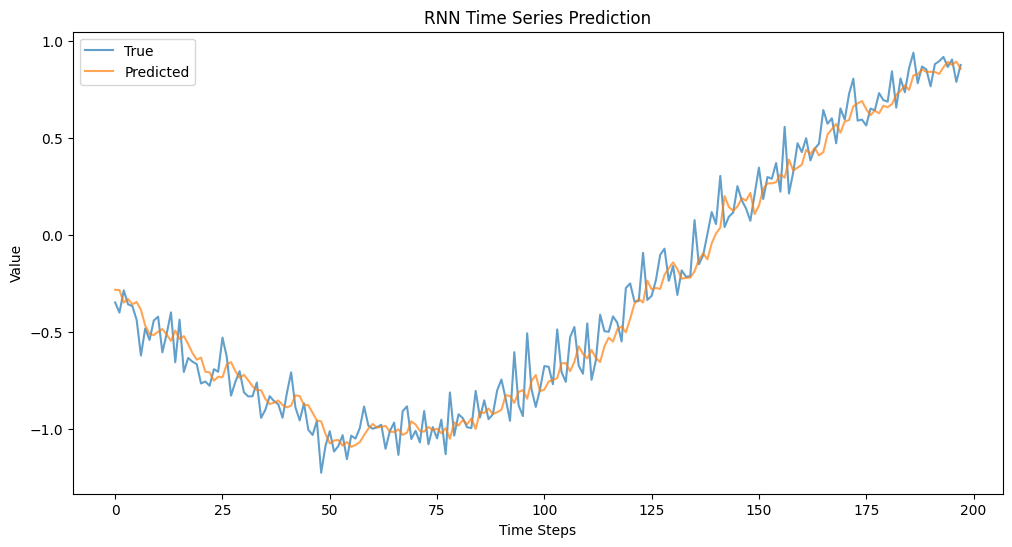

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Generate synthetic time series data
np.random.seed(0)
n = 1000  # Number of data points
t = np.linspace(0, 20, n)
data = np.sin(t) + 0.1 * np.random.randn(n)  # Synthetic time series data with noise

# Create sequences for training
seq_length = 10  # Length of input sequences
X = []
y = []
for i in range(len(data) - seq_length):
    X.append(data[i:i + seq_length])
    y.append(data[i + seq_length])

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Define the RNN architecture
model = models.Sequential()
model.add(layers.SimpleRNN(50, activation='relu', input_shape=(seq_length, 1)))
model.add(layers.Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Reshape the data for RNN input (batch_size, seq_length, input_dim)
X_train = X_train.reshape(-1, seq_length, 1)
X_test = X_test.reshape(-1, seq_length, 1)

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

# Evaluate the model on the test dataset
test_loss = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}')

# Make predictions
predictions = model.predict(X_test)

# Visualize the results (optional, requires matplotlib)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(y_test)), y_test, label='True', alpha=0.7)
plt.plot(np.arange(len(y_test)), predictions, label='Predicted', alpha=0.7)
plt.legend()
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('RNN Time Series Prediction')
plt.show()
